In [103]:
from gensim import corpora, models, similarities

In [104]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import konlpy
import nltk

# matplotlib 한글 폰트 깨짐
font_name = matplotlib.font_manager.FontProperties(
                fname="C:/Windows/Fonts/NanumGothic.ttf"
            ).get_name()
matplotlib.rc('font', family=font_name)

In [105]:
data3 = pd.read_excel('원광대DB.xlsx')

In [106]:
# 증상 NaN 값 제거
data3 = data3[data3['증상'].notnull()]

In [107]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1775 entries, 0 to 1779
Data columns (total 6 columns):
부위         0 non-null float64
질환명(국문)    1775 non-null object
질환명(영문)    1701 non-null object
증상         1775 non-null object
치료         1775 non-null object
진료과        0 non-null float64
dtypes: float64(2), object(4)
memory usage: 97.1+ KB


In [108]:
#data3.head(6)

In [109]:
data3.reset_index(inplace=True, drop=True)

In [110]:
# 말뭉치 만들기 
text = ""
for i in range(len(data3)):
    text = text + data3['증상'][i]

In [111]:
#text

In [112]:
type(text)

str

In [113]:
#print(text.split('\n')[:3])

In [12]:
# 중복된 문장 제거
corpus = list(set(text.split('\n')))

In [114]:
# corpus[:3]

In [14]:
# 공백 제거
corpus.remove('')

In [115]:
#corpus[:3]

In [116]:
from konlpy.tag import Kkma

k = Kkma()

In [118]:
# 예시를 통해 출력하는 결과 확인
test = ""
for i in range(3):
    test = test + corpus[i]

In [119]:
#k.morphs(test)

In [120]:
# k.pos(test)

In [121]:
# k.nouns(test)

In [122]:
# 일부 예시
test1 = corpus[:20]

In [123]:
test1 = [ [word for word in k.nouns(sen)]for sen in test1]

In [124]:
from collections import defaultdict
frequency = defaultdict(int)

#token들의 frequecy 카운트
for text in test1:
    for token in text:
        frequency[token] += 1
        
# test1 에서 빈도수가 1 이하인 token들 제거
texts = [[token for token in text if frequency[token] > 1]
         for text in test1]

# texts

In [129]:
# 단어 사전을 만듬
dictionary = corpora.Dictionary(texts)
#print(dictionary)

## 실제 보건의료 증상 데이터 활용

위에서 적응한 corpus는 증상들을 문장단위로 처리한 말뭉치

In [130]:
# corpus를 명사 단위로 쪼깸
sentences = [ [word for word in k.nouns(sen)]for sen in corpus]

에러 : 
java.lang.NullPointerExceptionPyRaisable: java.lang.NullPointerException

KKma 나 Hannanum 경우 위와 같은 에러가 발생할 수 있음.

나머지 Twitter, Mecab, Komoran은 문제 없음.

In [131]:
from collections import defaultdict
frequency = defaultdict(int)
for text in sentences:
    for token in text:
        frequency[token] += 1
texts = [[token for token in text if frequency[token] > 1]
         for text in sentences]

word2vec은 token을 숫자로 표현해야 더 좋은 성능을 나타냄.

추후에 숫자로 바꿔서 학습을 시켜볼 예정.

In [132]:
# 파라메터값 지정
num_features = 300 # 문자 벡터 차원 수
min_word_count = 40 # 최소 문자 수
num_workers = 4 # 병렬 처리 스레드 수
context = 10 # 문자열 창 크기
downsampling = 1e-3 # 문자 빈도수 Downsample

# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(texts, 
                          workers=num_workers, 
                          size=num_features, 
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)
model

In [133]:
#유사도가 높은 단어 출력
model.wv.most_similar("뇌")

C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('장애', 0.9999096393585205),
 ('근육', 0.9999021291732788),
 ('마비', 0.9998960494995117),
 ('안면', 0.9998946785926819),
 ('신체', 0.999894380569458),
 ('기능', 0.999893069267273),
 ('소실', 0.9998928904533386),
 ('수', 0.99989253282547),
 ('저하', 0.9998910427093506),
 ('혈관', 0.9998905658721924)]

In [91]:
from sklearn.manifold import TSNE
import gensim.models as g

In [92]:
model_name = 'medical'
model.save(model_name)
model = g.Doc2Vec.load(model_name)
vocab = list(model.wv.vocab)
X = model[vocab]

In [98]:
print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])

df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

371
[-0.03784304  0.12909178 -0.16276732 -0.09868066  0.04662125 -0.02805809
  0.09984965  0.17240381 -0.06204529 -0.13456453]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


(100, 2)

In [99]:
df.head(10)

,x,y
형,1.306875,-1.465742
다음,-8.001905,-1.006716
저,-10.748025,-0.734418
3,2.777270,-2.595067
기,-3.981246,-0.736497
상태,2.121426,-1.207518
사지,-8.432474,-0.660730
마비,0.892073,-0.649870
등,0.805973,-1.940496
중추,-9.377511,-0.760745


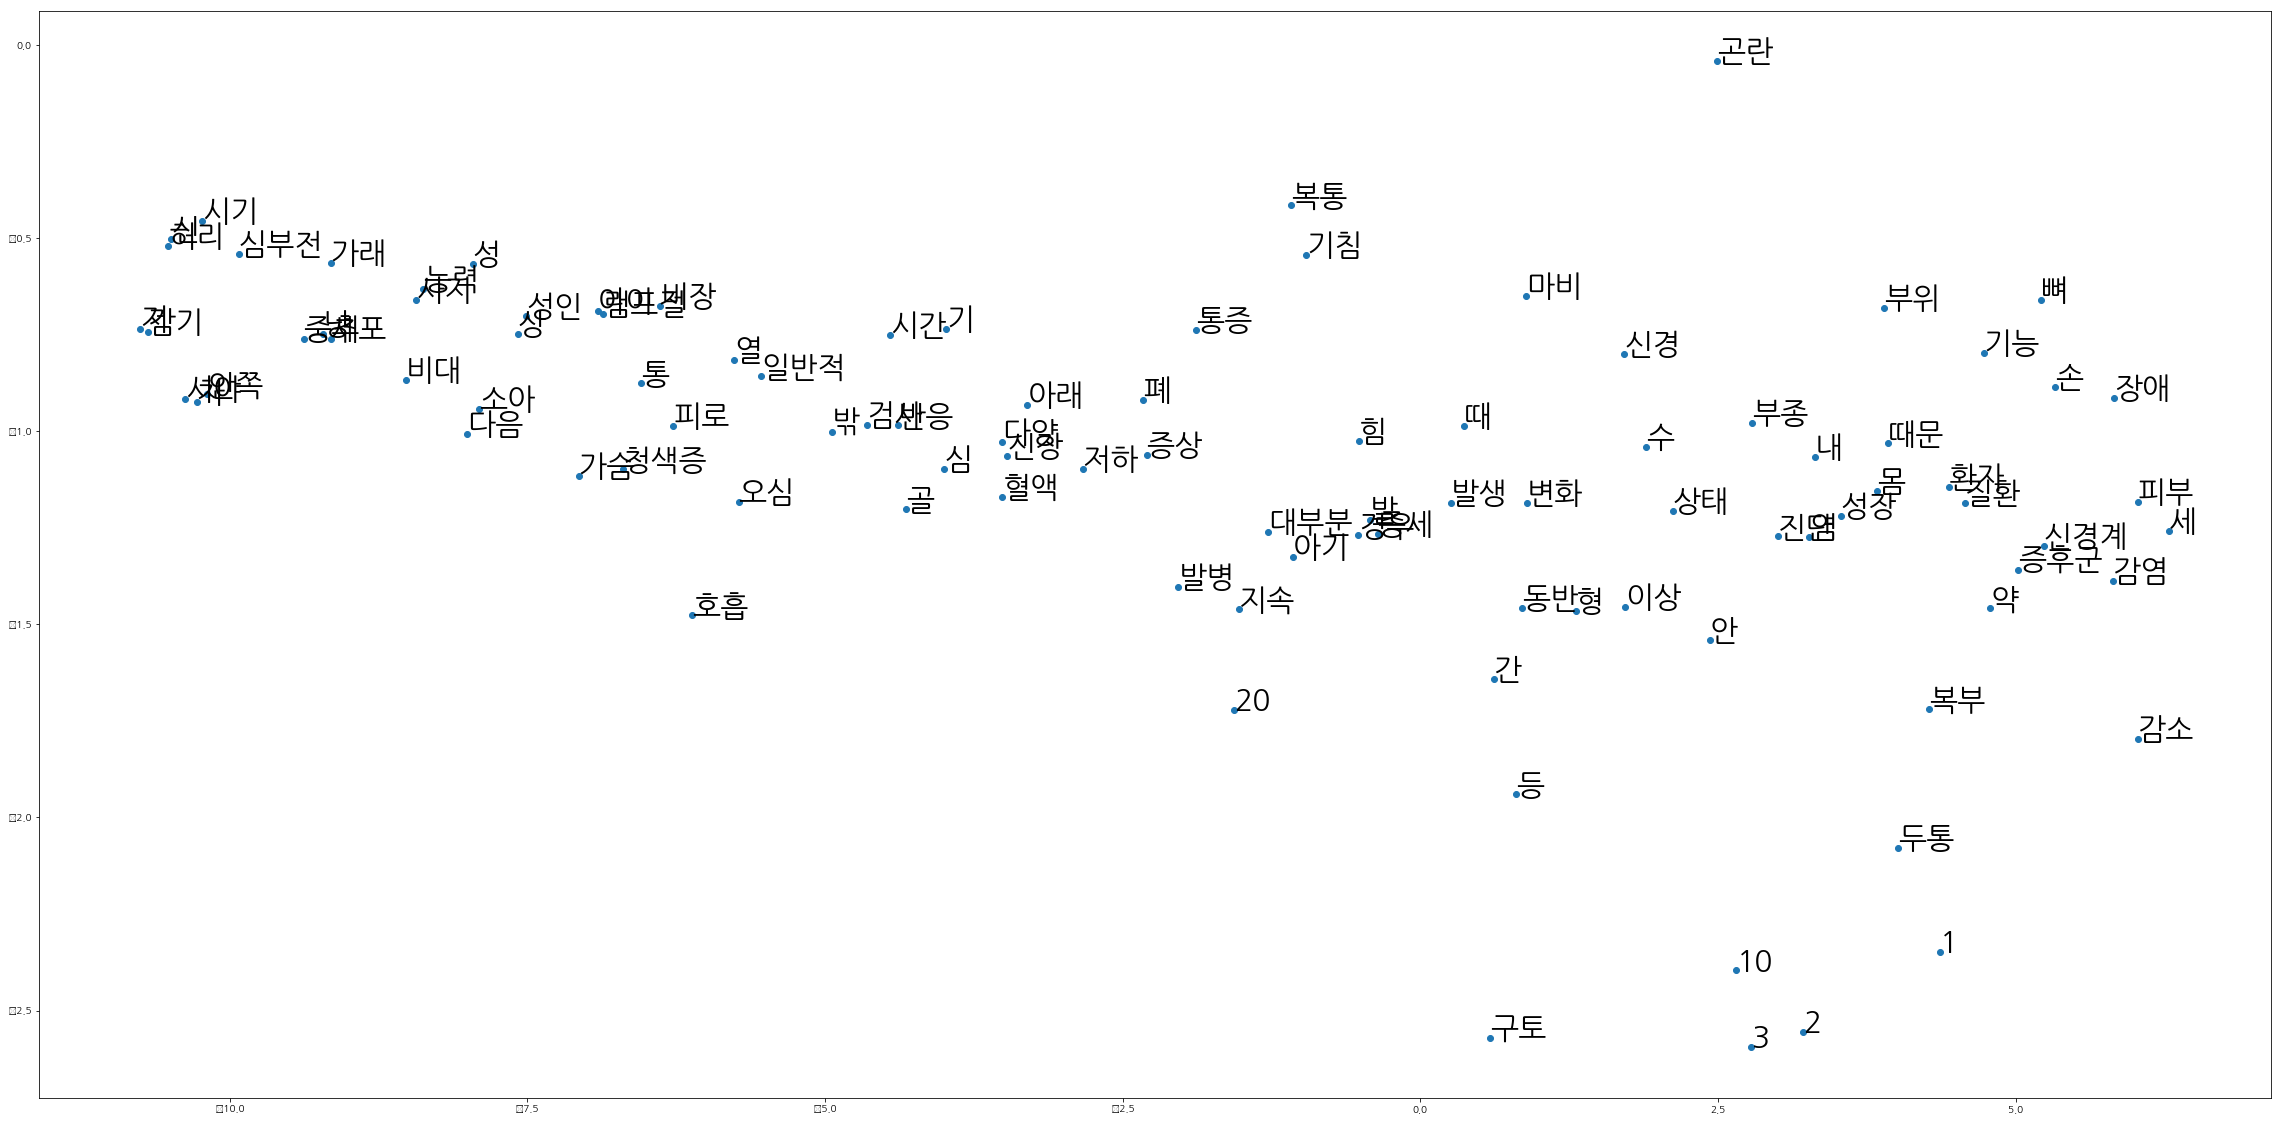

In [101]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

단어를 숫자로 바꿔서 시도

In [141]:
from konlpy.tag import Twitter
from eunjeon import Mecab

In [142]:
t = Twitter()
m = Mecab()

In [136]:
# sentences = [ [word for word in t.morphs(sen)]for sen in corpus]

In [185]:
sentences = [ [word for word in m.morphs(sen)]for sen in corpus]

In [186]:
from collections import defaultdict
frequency = defaultdict(int)
for text in sentences:
    for token in text:
        frequency[token] += 1
texts = [[token for token in text if frequency[token] > 1]
         for text in sentences]

In [187]:
# 파라메터값 지정
num_features = 300 # 문자 벡터 차원 수
min_word_count = 40 # 최소 문자 수
num_workers = 4 # 병렬 처리 스레드 수
context = 10 # 문자열 창 크기
downsampling = 1e-3 # 문자 빈도수 Downsample

# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(texts, 
                          workers=num_workers, 
                          size=num_features, 
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)
model

In [192]:
#유사도가 높은 단어 출력 (nouns으로 쪼개는게 더 유의미한 결과를 보여줌)
model.wv.most_similar("신경")

C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('마비', 0.9669324159622192),
 ('감각', 0.9478840827941895),
 ('기능', 0.9413312673568726),
 ('증', 0.9397122859954834),
 ('계', 0.9342344999313354),
 ('장애', 0.931854784488678),
 ('저하', 0.9272228479385376),
 ('부종', 0.9270877242088318),
 ('부전', 0.9115338921546936),
 ('및', 0.9044582843780518)]

In [137]:
dictionary = corpora.Dictionary(sentences)

In [193]:
#print(dictionary.token2id)

In [150]:
dictionary.save('medical.dict')

In [145]:
new_doc = "손 저림"
new_vec = dictionary.doc2bow(new_doc.split())
new_vec

In [148]:
corpus1 = [dictionary.doc2bow(text) for text in texts]

In [151]:
corpora.MmCorpus.serialize('medical.mm', corpus1)

In [195]:
#corpus1

In [153]:
corpus1 = corpora.MmCorpus('medical.mm')
print(corpus1)

MmCorpus(3851 documents, 10106 features, 142347 non-zero entries)


In [154]:
lsi = models.LsiModel(corpus1, id2word=dictionary, num_topics=2)

In [155]:
vec_lsi = lsi[new_vec]

In [156]:
print(vec_lsi)

[(0, 0.007333384028401819), (1, 0.0020531842173097756)]


In [157]:
index = similarities.MatrixSimilarity(lsi[corpus1])

C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [158]:
index.save('medical.index')
index = similarities.MatrixSimilarity.load('medical.index')

In [159]:
sims = index[vec_lsi]

In [164]:
sh = list(enumerate(sims))

In [167]:
sh[2][1]

0.8366797

In [194]:
# sorted(sh, key=lambda sh: sh[1],reverse=True)

## 출처
https://programmers.co.kr/learn/courses/21/lessons/1699